<a href="https://colab.research.google.com/github/liachicue/Linear_Classifier_Models/blob/main/MinCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils.validation import check_random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stars.csv to Stars.csv


In [ ]:
dfStars = pd.read_csv('Stars.csv')
#dfPD = pd.read_csv('pd_speech_features.csv')

## Estrellas

**Observaciones**

Con el fin de utilizar la funcion train_test, debemos escojer un tamaño que le convenga a las funciones matematicas o algo asi wey idk los tamaños de xtrain y ytest deben ser iguales. test_size = 0.5, tenemos un valor de Acc(%):  17.5.

Sin embargo, se observo que, sin realizar la partitura de datos, el acc es mejor  Acc(%):  34.583333333333336

In [ ]:
dfStars["Color"] = dfStars["Color"].astype('category').cat.codes
dfStars["Spectral_Class"] = dfStars["Spectral_Class"].astype('category').cat.codes #Se esta tratando como una categoria

In [ ]:
X = dfStars.drop(columns=['Type'])
t = dfStars['Type']

In [ ]:
X = X.iloc[:,:2]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,t,test_size = 0.5, random_state = 123)

Wtilde: 
 [[ 2.36470446e-01  2.77757358e-01  1.30302171e-01  1.83805470e-01
   2.07410552e-01 -3.57459981e-02]
 [-1.61637965e-06 -1.48344721e-05  3.87326309e-06  4.40950968e-06
  -6.45354425e-06  1.46216232e-05]
 [-4.92925667e-07  4.16403629e-07 -4.00690785e-08 -5.91738363e-07
   2.51911239e-07  4.56418241e-07]]
Primeras 10 predicciones 
 [[ 0.23151139  0.2322452   0.14218534  0.19733384  0.18761108  0.00911314]
 [ 0.23155342  0.23263089  0.14208464  0.1972192   0.18777887  0.00873298]
 [ 0.23226786  0.23918773  0.14037266  0.19527019  0.19063134  0.00227022]
 [ 0.23194458  0.23622084  0.14114731  0.1961521   0.18934063  0.00519455]
 [ 0.23333629  0.24899332  0.13781243  0.19235551  0.19489713 -0.00739467]
 [ 0.23187993  0.23562746  0.14130224  0.19632848  0.18908249  0.00577941]
 [ 0.23220805  0.23863886  0.14051597  0.19543335  0.19039256  0.00281122]
 [ 0.23226786  0.23918773  0.14037266  0.19527019  0.19063134  0.00227022]
 [ 0.23218704  0.23844601  0.14056632  0.19549067  0.190308

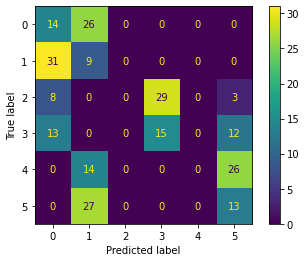

In [ ]:
y = ytrain.shape[0]

T1 = np.tile([1.,0.,0.,0.,0.,0.],(40,1))
T2 = np.tile([0.,1.,0.,0.,0.,0.],(40,1))
T3 = np.tile([0.,0.,1.,0.,0.,0.],(40,1))
T4 = np.tile([0.,0.,0.,1.,0.,0.],(40,1))
T5 = np.tile([0.,0.,0.,0.,1.,0.],(40,1))
T6 = np.tile([0.,0.,0.,0.,0.,1.],(40,1))

T1 = np.concatenate((T1,T2,T3,T4,T5,T6), axis=0)

Xtilde = np.concatenate((np.ones((40*6,1)),X), axis = 1) #Vector de unos de 40*6 
XtildeT = Xtilde.T

# Calculamos nuestro modelo
Wtilde_mse = np.linalg.inv(XtildeT@Xtilde)@(XtildeT@T1)#7,120 x 120,6

print('Wtilde: \n', Wtilde_mse) #Primer columna, modelo para clase 1; 2 datos, donde el primer dato es el bias y el otro es el W)
                              # Y así para cada clase
Y = Xtilde@Wtilde_mse
print('Primeras 10 predicciones \n', Y[:10,:])

t_Est = np.argmax(Y,axis=1)

acc = accuracy_score(t,t_Est)
print('\n Acc(%): ',acc*100)
cMat = confusion_matrix(t,t_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels=dfStars['Type'].unique())
ax.plot()
plt.show()  

In [ ]:
# Para el hiperplano asociado a w1
wtilde_1 = Wtilde_mse[:,0]# El bias + (el modelo para W1)
w1 = wtilde_1[1:]
w_10 = wtilde_1[0]
print('wtilde_1: ',wtilde_1,'\n\nw10, Bias: ',w_10,'\n\nw1, Modelo: ',w1)
# Para la recta: y = m*x1 + b
b = -w_10/np.linalg.norm(w1)
print('\n\nEl intersecto:', b)

wtilde_1:  [ 4.26617467e-01 -1.37033254e-05  1.74504377e-07 -8.65320810e-05
 -7.87746648e-03 -1.08798237e-02 -7.36521430e-03] 

w10, Bias:  0.42661746650140175 

w1, Modelo:  [-1.37033254e-05  1.74504377e-07 -8.65320810e-05 -7.87746648e-03
 -1.08798237e-02 -7.36521430e-03]


El intersecto: -27.848475485673152


In [ ]:
#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', t[:10].to_numpy())
print('Predicciones:', t_Est[:10])

Etiquetas: [0 0 0 0 0 0 0 0 0 0]
Predicciones: [0 0 0 0 0 1 0 5 4 0]


## Parkinson

Cuando hacemos que la columna 'id' NO desaparezce
*   X = X.iloc[:,:] ACC: 25.396825396825395
*   X = X.iloc[:,:2]ACC: 46.42857142857143
*   X = X.iloc[:,:4]ACC: 45.8994708994709
*   X = X.iloc[:,:6] ACC:45.5026455026455
*   X = X.iloc[:,:8] ACC: 45.370370370370374
*   X = X.iloc[:,:338] Acc(%):  45.63492063492063
*   X = X.iloc[:,:378] ACC: 46.164021164021165
* X = X.iloc[:,:189] Acc(%):  45.767195767195766
* X = X.iloc[:,:93] Acc 45.8994708994709

Cuando hacemos que la columna 'id' desaparezca X = dfPD.drop(columns=['id'])

*   X = X.iloc[:,:]#46.164021164021165
*   X = X.iloc[:,:2]39.81481481481482
*   X = X.iloc[:,:4]37.83068783068783
*   X = X.iloc[:,:6] 38.75661375661375

**Observaciones**

Con el fin de utilizar la funcion train_test, debemos escojer un tamaño que le convenga a las funciones matematicas o algo asi wey idk los tamaños de xtrain y ytest deben ser iguales. test_size = 0.5, tenemos un valor de Acc(%):  52.38095238095239

Sin embargo, se observo que, sin realizar la partitura de datos, el acc es mejor Acc(%):  25.396825396825395

In [ ]:
 X =dfPD.drop(columns=['class']) # X sera Dataframe
 t = dfPD['class'] # Etiqueta

NameError: ignored

In [ ]:
X = X.iloc[:,2:4] #X.iloc[:,:4]
X
#X1 = X[:378]
#X2 = X[378:]

In [ ]:
X1 = X.iloc[:,:1]
print(X1)
X2 = X.iloc[:,1:2]
print(X2)

In [ ]:
#Xtrain, Xtest, ytrain, ytest = train_test_split(X,t,test_size = 0.5, random_state = 123)

In [ ]:
T1 = np.tile([1.,0.],(378,1))
T2 = np.tile([0.,1.],(378,1))
T = np.concatenate((T1,T2), axis=0)

Xtilde = np.concatenate((np.ones((378*2,1)),X), axis = 1) #Vector de unos de 378*2 

XtildeT = Xtilde.T

# Calculamos nuestro modelo
Wtilde_mse = np.linalg.inv(XtildeT@Xtilde)@(XtildeT@T)

#print('Wtilde: \n', Wtilde_mse) #Primer columna, modelo para clase 1; 2 datos, donde el primer dato es el bias y el otro es el W)
                              # Y así para cada clase
Y = Xtilde@Wtilde_mse
#print('\n', Y[:10,:])

t_Est = np.argmax(Y,axis=1)

acc = accuracy_score(t,t_Est)
print('\n Acc(%): ',acc*100)
cMat = confusion_matrix(t,t_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels= ['Negative','Positive'])
ax.plot()
plt.show()                              

In [ ]:
#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', t[:10].to_numpy())
print('Predicciones:', t_Est[:10])

In [ ]:
# Para el hiperplano asociado a w1
wtilde_1 = Wtilde_mse[:,0]# El bias + (el modelo para W1)
w1 = wtilde_1[1:]
w_10 = wtilde_1[0]
print('wtilde_1: ',wtilde_1,'\nw10, Bias: ',w_10,'\nw1, Modelo: ',w1)
# Para la recta: y = m*x1 + b
b = -w_10/np.linalg.norm(w1)
print('El intersecto:', b)

In [ ]:
plt.scatter(Xtrain.iloc[:,2:3],Xtrain.iloc[:,3:4],label='Clase 1')
plt.scatter(Xtest.iloc[:,2:3],Xtest.iloc[:,3:4],label='Clase 2')
plt.show()

In [ ]:
x1 = np.linspace(0,1,378)#Varianción
x2 = np.linspace(0,1,378)

dataX1, dataX2 = np.meshgrid(x1,x2)#Utilizamos meshgrid para graficar el hiperplano
dataMuestra = np.concatenate((dataX1.flatten().reshape(378**2,1),dataX2.flatten().reshape(378**2,1)),axis = 1)

plt.scatter(Xtrain.iloc[:,2:3],Xtrain.iloc[:,3:4],label='Clase 1')
plt.scatter(Xtest.iloc[:,2:3],Xtest.iloc[:,3:4],label='Clase 2')
#plt.scatter(dataMuestra[:,0],dataMuestra[:,1],label='espacio muestral',alpha=0.2)


# Se grafica la linea de decision

aux = Wtilde_mse[:,0] - Wtilde_mse[:,1]; #Primert vector - segundo
a = aux[0]#bias
b = aux[1]#W1
c = aux[2]#W2, la m siempre sera negativa, nos interesa la direccion del vector
x1 = np.linspace(0,1, 100);
x2 = -(b/c)*x1 - (a/c);

plt.plot(x1, x2, 'k', 'linewidth', 1.5)


plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()